In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

In [54]:
prof_dir = "profile_results"
layer_norms = json.load(open(f"{prof_dir}/layerwise_norms.json", "r"))

In [55]:
layer_norms["0"].keys()

dict_keys(['attn_sparsity', 'mlp_sparsity'])

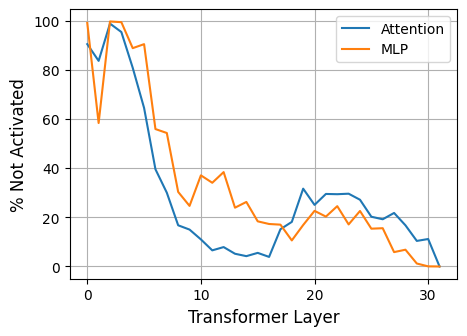

In [ ]:
# Plot sparsity
attn_threshold = 5.0
mlp_threshold = 1.0
layers, attn_sparsities, mlp_sparsities = [], [], []
for layer, sparsity_dict in layer_norms.items():
    attn_sparsity = sparsity_dict["attn_sparsity"][str(attn_threshold)]
    mlp_sparsity = sparsity_dict["mlp_sparsity"][str(mlp_threshold)]
    layers.append(layer)
    attn_sparsities.append(attn_sparsity * 100)
    mlp_sparsities.append(mlp_sparsity * 100)

# Define subplots
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))
ax.plot(layers, attn_sparsities, label="Attention")
ax.plot(layers, mlp_sparsities, label="MLP")
ax.set_xticks(np.arange(0, len(layers), 10))
ax.set_xlabel("Transformer Layer", fontsize=12)
ax.set_ylabel("% Not Activated", fontsize=12)
ax.legend()
ax.grid(True)
plt.show()